# Assignment 2: Sequence Alignment
In this Python notebook, you'll dive into sequence alignment, key concepts in bioinformatics. The notebook is structured with two types of tasks:
* Challenges: Python programming exercises
* Questions: Conceptual understanding

Your primary goal is to complete the Challenges and answer the Questions.

Once you've finished, please upload a ZIP file containing:
1. The iPython notebook with your solutions for challenges.
2. A PDF report with your answers to the questions and solutions to the questions.
3. Name the ZIP file HW2_{student_id}.zip (e.g., HW2_403112XXX.zip).

This assignment consists of 9 challenges and 4 questions, with a total of **250** points plus **30** bonus points.

## Pairwise Sequence Alignment
Sequence alignment is a fundamental bioinformatics technique used to compare biological sequences (DNA, RNA, or protein) and identify regions of similarity. In this section, you will implement both global and local alignment techniques to align sequences and uncover their similarities.

## Challenge (10 Points)
Write a Python function to visualize pairwise sequence alignments by highlighting matches, mismatches, and gaps. In the output:
* A `|` symbol should indicate a match between aligned characters.
* A `.` symbol should indicate a mismatch between aligned characters.
* A `space`  should represent a gap (either in `seq1` or `seq2`).

as example:
```
G-ATTACA
| |.|||
GCACTAC-
```

In [1]:
def display_alignment(seq1, seq2):
    """
    Visualizes pairwise sequence alignment by displaying aligned sequences
    with symbols that denote matches, mismatches, and gaps.

    Parameters:
    seq1 (str): The first aligned sequence with potential gaps represented by '-'.
    seq2 (str): The second aligned sequence with potential gaps represented by '-'.

    Output:
    Prints the aligned sequences along with a third line of symbols:
        - '|' for matches between aligned characters.
        - '.' for mismatches.
        - ' ' (space) for gaps.
    """

    # write your code here
    if len(seq1) != len(seq2):
        raise ValueError("The sequences must have the same length for alignment visualization.")

    match_line = []

    for char1, char2 in zip(seq1, seq2):
        if char1 == char2 and char1 != '-':  # Match
            match_line.append('|')
        elif char1 == '-' or char2 == '-':  # Gap
            match_line.append(' ')
        else:  # Mismatch
            match_line.append('.')

    # Join the match line into a string
    match_line_str = ''.join(match_line)

    # Print the sequences and match line
    print(seq1)
    print(match_line_str)
    print(seq2)

# Example usage
seq1 = "G-ATTACA"
seq2 = "GCACTAC-"
display_alignment(seq1, seq2)

G-ATTACA
| |.||| 
GCACTAC-


## Challenge (30 Points)

### Needleman-Wunsch Algorithm for Global Sequence Alignment
The Needleman-Wunsch algorithm is a fundamental method in bioinformatics used for aligning two sequences globally, which means it attempts to align the entirety of both sequences. It is particularly useful in cases where we want to find the optimal alignment of sequences of similar length. The algorithm works by scoring matches, mismatches, and gaps to create an optimal alignment.

#### Steps:
1. **Matrix Initialization:** The algorithm starts by creating a scoring matrix with dimensions `(len(seq1)+1, len(seq2)+1)`, where the first row and column represent the alignment of gaps. The first row and column are initialized with incremental gap penalties, as aligning a sequence to gaps introduces penalties.


2. **Matrix Filling:** Next, each cell in the matrix is filled based on three potential operations:
    * Match/Mismatch: If characters from both sequences align.
    * Deletion: If a gap is introduced in the second sequence.
    * Insertion: If a gap is introduced in the first sequence.

3. **Traceback:** Once the matrix is filled, a traceback is performed starting from the bottom-right corner of the matrix. By tracing back the path of highest scores, we generate the aligned sequences, introducing gaps where necessary to maintain alignment.

In [2]:
import numpy as np

def needleman_wunsch(seq1, seq2, MATCH_SCORE=1, MISMATCH_SCORE=-1, GAP_PENALTY=-2):
    """
    Performs global alignment using the Needleman-Wunsch algorithm.

    Parameters:
        seq1 (str): The first DNA sequence.
        seq2 (str): The second DNA sequence.
        MATCH_SCORE (int): The score for a match.
        MISMATCH_SCORE (int): The score for a mismatch.
        GAP_PENALTY (int): The penalty for a gap.

    Returns:
        (str, str): The aligned sequences align1 and align2.
    """

    # === Task 1: Initialize the scoring matrix with gap penalties in the first row and column. ===
    n, m = len(seq1), len(seq2)
    score_matrix = np.zeros((n + 1, m + 1))
    # wrtie your code here
    # Initialize the first row and column with gap penalties
    for i in range(n + 1):
        score_matrix[i][0] = i * GAP_PENALTY
    for j in range(m + 1):
        score_matrix[0][j] = j * GAP_PENALTY

    # === Task 2: Fill the scoring matrix based on match, mismatch, and gap penalties. ===
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # write your code here to calculate match, delete, and insert score
            if seq1[i - 1] == seq2[j - 1]:
                match_score = score_matrix[i - 1][j - 1] + MATCH_SCORE  # Match
            else:
                match_score = score_matrix[i - 1][j - 1] + MISMATCH_SCORE  # Mismatch
            delete_score = score_matrix[i - 1][j] + GAP_PENALTY  # Deletion
            insert_score = score_matrix[i][j - 1] + GAP_PENALTY  # Insertion
            score_matrix[i][j] = max(match_score, delete_score, insert_score)



    # === Task 3: Traceback to get the aligned sequences. ===
    align1, align2 = '', ''
    # write your code here
    i, j = n, m

    while i > 0 or j > 0:
        current_score = score_matrix[i][j]
        if i > 0 and j > 0 and current_score == score_matrix[i - 1][j - 1] + (MATCH_SCORE if seq1[i - 1] == seq2[j - 1] else MISMATCH_SCORE):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif i > 0 and current_score == score_matrix[i - 1][j] + GAP_PENALTY:
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        else:
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1

    return align1, align2

In [3]:
# Example usage
seq1 = "GATTACA"
seq2 = "GCACTAC"

align_seq1, align_seq2 = needleman_wunsch(seq1, seq2)
display_alignment(align_seq1, align_seq2)

G-ATTACA
| |.||| 
GCACTAC-


## Question (20 Points)
Experiment with different values for `MATCH_SCORE`, `MISMATCH_SCORE`, and `GAP_PENALTY` in the Needleman-Wunsch algorithm. Describe how each of these parameters affects the resulting alignment. Specifically, consider:
1. How does increasing or decreasing the `MATCH_SCORE` influence the alignment?

2. How does changing the `MISMATCH_SCORE` affect the algorithm’s tolerance for mismatches?

3. How does adjusting the `GAP_PENALTY` impact the frequency and placement of gaps in the alignment?

4. compaire the rusult with open/close gap methode and discuse how it change the algorithms behavior?

Reflect on how these parameter changes might affect alignments for different types of sequences, such as highly similar sequences versus sequences with more variability.

In [5]:
# write your code here
# Sequences to test the Needleman-Wunsch algorithm
seqs = [
    ("GATTACA", "GCACTAC"),  # Highly similar sequences
    ("GATTACA", "GCATGCU"),  # Slightly similar sequences
    ("GATTACA", "TGCATGC"),  # More variability
    ("AGCTGAC", "TGCTGCA"),  # Similar sequences with more insertions/deletions
]

# Different scoring configurations to test
score_configs = [
    {"MATCH_SCORE": 1, "MISMATCH_SCORE": -1, "GAP_PENALTY": -2},
    {"MATCH_SCORE": 3, "MISMATCH_SCORE": -1, "GAP_PENALTY": -2},
    {"MATCH_SCORE": 1, "MISMATCH_SCORE": -3, "GAP_PENALTY": -2},
    {"MATCH_SCORE": 1, "MISMATCH_SCORE": -1, "GAP_PENALTY": -4},
]

# Running the tests
for seq1, seq2 in seqs:
    print(f"\nAligning sequences:\n{seq1}\n{seq2}")
    for config in score_configs:
        print(f"\nConfiguration: {config}")
        align1, align2 = needleman_wunsch(seq1, seq2, **config)
        display_alignment(align1, align2)



Aligning sequences:
GATTACA
GCACTAC

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -1, 'GAP_PENALTY': -2}
G-ATTACA
| |.||| 
GCACTAC-

Configuration: {'MATCH_SCORE': 3, 'MISMATCH_SCORE': -1, 'GAP_PENALTY': -2}
G-ATTACA
| |.||| 
GCACTAC-

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -3, 'GAP_PENALTY': -2}
G-ATTACA
| |.||| 
GCACTAC-

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -1, 'GAP_PENALTY': -4}
G-ATTACA
| |.||| 
GCACTAC-

Aligning sequences:
GATTACA
GCATGCU

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -1, 'GAP_PENALTY': -2}
GATTACA
|..|.|.
GCATGCU

Configuration: {'MATCH_SCORE': 3, 'MISMATCH_SCORE': -1, 'GAP_PENALTY': -2}
G-ATTACA
| | |.|.
GCA-TGCU

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -3, 'GAP_PENALTY': -2}
G-ATTACA
| | |.|.
GCA-TGCU

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -1, 'GAP_PENALTY': -4}
GATTACA
|..|.|.
GCATGCU

Aligning sequences:
GATTACA
TGCATGC

Configuration: {'MATCH_SCORE': 1, 'MISMATCH_SCORE': -1, 'GAP_PENALTY':

<div dir=rtl>
Highly Similar Sequences

برای توالی‌هایی که شباهت زیادی با هم دارند، تغییرات در پارامترها، به‌ویژه MATCH_SCORE و GAP_PENALTY تأثیر کمی در ساختار کلی خواهد داشت. هنگامی که MATCH_SCORE افزایش یابد، الگوریتم بیشتر به دنبال تطابق‌های کامل است و گپ‌ها به ندرت ایجاد می‌شوند. این به این معناست که بیشتر بخش‌های توالی‌ها به هم تطبیق پیدا می‌کنند و به‌ویژه هنگامی که GAP_PENALTY پایین است، احتمال ایجاد گپ‌ها نیز کاهش می‌یابد. در این حالت، MISMATCH_SCORE نیز تأثیر کمتری خواهد داشت، چرا که توالی‌ها از ابتدا شباهت زیادی دارند و میزان تغییرات میان آن‌ها کم است.

Sequences with More Variability

برای توالی‌هایی که تفاوت‌های زیادی دارند، تأثیر تغییرات در پارامترها بیشتر خواهد بود. در این حالت، افزایش MATCH_SCORE ممکن است به الگوریتم کمک کند تا تلاش بیشتری برای تطابق بخش‌های مشابه انجام دهد، اما به دلیل تفاوت‌های زیاد، هنوز گپ‌های بیشتری در نتیجه به وجود خواهد آمد. کاهش MISMATCH_SCORE نیز باعث حساسیت بیشتر الگوریتم به تفاوت‌ها می‌شود و احتمالاً منجر به ایجاد گپ‌های بیشتر می‌شود، زیرا الگوریتم به تطابق دقیق‌تر تمایل خواهد داشت. در اینجا، GAP_PENALTY نیز تأثیر بیشتری دارد. با افزایش GAP_PENALTY، الگوریتم تمایل به وارد کردن گپ‌ها کمتر می‌شود، که ممکن است به alignmentsهای پیچیده‌تری با گپ‌های کمتر منجر شود.

Open/Close Gap

در روش Open/Close Gap , الگوریتم به طور متفاوتی با گپ‌ها برخورد می‌کند. در این روش، گپ‌ها به صورت باز یا بسته با هزینه‌های مختلف محاسبه می‌شوند. این باعث می‌شود که در توالی‌های با تغییرات زیاد، گپ‌ها ممکن است به شکلی متفاوت نسبت به الگوریتم استاندارد در Needleman-Wunsch ایجاد شوند. در واقع، هزینه‌های متفاوت برای باز و بسته شدن گپ‌ها می‌تواند باعث شود که در برخی موارد گپ‌ها به راحتی وارد شوند و در موارد دیگر، گپ‌ها تنها در مواقع ضروری وارد شوند. در توالی‌های بسیار مشابه، این روش می‌تواند به تطابق دقیق‌تری منجر شود، زیرا الگوریتم ممکن است از وارد کردن گپ‌ها جلوگیری کند، در حالی که در توالی‌های با تغییرات زیاد، این روش ممکن است بیشتر به گپ‌ها اجازه دهد تا در نقاط مختلف وارد شوند.

به طور کلی، تغییرات پارامترهای مختلف در Needleman-Wunsch و همچنین استفاده از روش گپ باز/بسته تأثیر زیادی بر نتایج alignment خواهند داشت، به‌ویژه زمانی که توالی‌ها تفاوت‌های زیادی داشته باشند.
</div>

## Challenge (20 Points)
Implement the Needleman-Wunsch algorithm in Python with open and close gap penalties.
* Open Gap Penalty: This penalty is applied when a gap is first introduced in the sequence alignment.

* Close Gap Penalty: This penalty is applied for each additional gap in an already opened gap region.

Improve the `needleman_wunsch` function to align two sequences using both open and close gap penalties.

In [6]:
def modified_needleman_wunsch(seq1, seq2, MATCH_SCORE=1, MISMATCH_SCORE=-1, OPEN_GAP_PENALTY=-3, CLOSE_GAP_PENALTY=-1):
    # write your code here

    # Length of the sequences
    n, m = len(seq1), len(seq2)

    # Initialize matrices
    score_matrix = np.zeros((n + 1, m + 1))
    open_gap_matrix = np.zeros((n + 1, m + 1))
    extend_gap_matrix = np.zeros((n + 1, m + 1))

    # Initialize the first row and column with gap penalties
    for i in range(1, n + 1):
        score_matrix[i][0] = OPEN_GAP_PENALTY + (i - 1) * CLOSE_GAP_PENALTY
        open_gap_matrix[i][0] = OPEN_GAP_PENALTY + (i - 1) * CLOSE_GAP_PENALTY
        extend_gap_matrix[i][0] = np.inf  # No gap extension is possible in the first column

    for j in range(1, m + 1):
        score_matrix[0][j] = OPEN_GAP_PENALTY + (j - 1) * CLOSE_GAP_PENALTY
        open_gap_matrix[0][j] = OPEN_GAP_PENALTY + (j - 1) * CLOSE_GAP_PENALTY
        extend_gap_matrix[0][j] = np.inf  # No gap extension is possible in the first row

    # Fill the matrices
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # Calculate match or mismatch score
            match = score_matrix[i-1][j-1] + (MATCH_SCORE if seq1[i-1] == seq2[j-1] else MISMATCH_SCORE)

            # Calculate gap opening and extension for seq1 (open gap in seq2)
            open_gap1 = score_matrix[i-1][j] + OPEN_GAP_PENALTY
            extend_gap1 = extend_gap_matrix[i-1][j] + CLOSE_GAP_PENALTY

            # Calculate gap opening and extension for seq2 (open gap in seq1)
            open_gap2 = score_matrix[i][j-1] + OPEN_GAP_PENALTY
            extend_gap2 = extend_gap_matrix[i][j-1] + CLOSE_GAP_PENALTY

            # Update the score matrix with the best score for each position
            score_matrix[i][j] = max(match, open_gap1, open_gap2)

            # Update open gap matrix (first gap opening)
            open_gap_matrix[i][j] = max(open_gap1, open_gap2)

            # Update extend gap matrix (subsequent gap extensions)
            extend_gap_matrix[i][j] = max(extend_gap1, extend_gap2)

    # Traceback to get the aligned sequences
    align1, align2 = '', ''
    i, j = n, m

    while i > 0 or j > 0:
        if i > 0 and j > 0 and score_matrix[i][j] == score_matrix[i-1][j-1] + (MATCH_SCORE if seq1[i-1] == seq2[j-1] else MISMATCH_SCORE):
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif i > 0 and score_matrix[i][j] == open_gap_matrix[i-1][j] + OPEN_GAP_PENALTY:
            align1 = seq1[i-1] + align1
            align2 = '-' + align2
            i -= 1
        elif j > 0 and score_matrix[i][j] == open_gap_matrix[i][j-1] + OPEN_GAP_PENALTY:
            align1 = '-' + align1
            align2 = seq2[j-1] + align2
            j -= 1
        else:
            align1 = '-' + align1
            align2 = '-' + align2
            i -= 1
            j -= 1

    return align1, align2


## Challenge (30 Points)

### Smith-Waterman Algorithm for Local Sequence Alignment
The Smith-Waterman algorithm is a popular dynamic programming algorithm used in bioinformatics for local sequence alignment. Unlike the Needleman-Wunsch algorithm, which aligns entire sequences globally, Smith-Waterman is designed to identify the best matching subsections within two sequences. This local alignment approach is useful for comparing parts of sequences that may share high similarity, such as finding conserved domains within proteins or similar motifs in DNA.

The algorithm fills in a scoring matrix based on matches, mismatches, and gap penalties but differs from Needleman-Wunsch in that it resets negative scores to zero, allowing for flexible alignment start and end points within each sequence. The final alignment is traced back from the cell with the highest score in the matrix, producing a locally optimal alignment.

#### Steps:
1. **Matrix Initialization:** Set the matrix to zero for the first row and column.

2. **Matrix Filling:** For each cell, calculate the score based on:
    * A match/mismatch score (based on the characters from each sequence).
    * Gap penalties for insertions or deletions.
    * Any score below zero is reset to zero.

3. **Traceback:** Start from the cell with the highest score, and backtrack until reaching a cell with a score of zero, forming the optimal local alignment.



In [7]:
def smith_waterman(seq1, seq2, MATCH_SCORE=3, MISMATCH_SCORE=-3, GAP_PENALTY=-2):
    """
    Performs local alignment using the Smith-Waterman algorithm.

    Parameters:
        seq1 (str): The first sequence.
        seq2 (str): The second sequence.
        MATCH_SCORE (int): The score for a match.
        MISMATCH_SCORE (int): The score for a mismatch.
        GAP_PENALTY (int): The penalty for a gap.

    Returns:
        (str, str): The locally aligned sequences align1 and align2.
    """
    # === Task 1: Initialize the scoring matrix with zeros, allowing flexible start points for local alignment. ===
    n, m = len(seq1), len(seq2)
    # wrtie your code here
    scoring_matrix = np.zeros((n + 1, m + 1), dtype=int)

    # === Task 2: Fill the scoring matrix based on match, mismatch, and gap penalties. ===
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # write your code here
            match = scoring_matrix[i - 1, j - 1] + (MATCH_SCORE if seq1[i - 1] == seq2[j - 1] else MISMATCH_SCORE)
            delete = scoring_matrix[i - 1, j] + GAP_PENALTY
            insert = scoring_matrix[i, j - 1] + GAP_PENALTY
            scoring_matrix[i, j] = max(match, delete, insert, 0)

    # === Task 3: Traceback from the highest-scoring cell to form the optimal local alignment. ===
    # write your code here
    max_i, max_j = np.unravel_index(np.argmax(scoring_matrix), scoring_matrix.shape)
    align1, align2 = '', ''
    i, j = max_i, max_j

    while i > 0 and j > 0 and scoring_matrix[i, j] > 0:
        if scoring_matrix[i, j] == scoring_matrix[i - 1, j - 1] + (
            MATCH_SCORE if seq1[i - 1] == seq2[j - 1] else MISMATCH_SCORE):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif scoring_matrix[i, j] == scoring_matrix[i - 1, j] + GAP_PENALTY:
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        else:
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1

    # === Task 4: Return the aligned subsequences only, skipping initial and final gaps. ===
    # write your code here
    return align1, align2

# Example Usage
seq1 = "GGTTGACTA"
seq2 = "TGTTACGG"
align1, align2 = smith_waterman(seq1, seq2)
print(f"Alignment 1: {align1}")
print(f"Alignment 2: {align2}\n")


seq1 = "CCGTACTA"
seq2 = "CAGACCTA"
align1, align2 = smith_waterman(seq1, seq2)
print(f"Alignment 1: {align1}")
print(f"Alignment 2: {align2}\n")

Alignment 1: GTTGAC
Alignment 2: GTT-AC

Alignment 1: C-GTA-CTA
Alignment 2: CAG-ACCTA



## Challenge (10 Point)
In this challenge, we aim to modify the `display_alignment` function to handle local alignment. Your task is to:
1. Modify the existing `display_alignment` function and create a new function called `display_local_alignment`.

2. The new function should display the entire sequences, but for the local alignment part, it should show alignment symbols to indicate matching positions.

3. The alignment symbols should only appear for the part of the sequences that are locally aligned, while the rest of the sequences should remain unaltered.

Example:
```
seq1 = "CGTAGCCCAATTCG"
seq2 = "TAGCGCCA"
```
Output:
```
CGTAGC-CCAATTCG
  |||| |||     
  TAGCGCCA     

```
Note: You are welcome to modify the input and output of the `smith_waterman` and `display_alignment` functions to effectively solve this challenge.

In [8]:
def modified_smith_waterman(seq1, seq2, MATCH_SCORE=3, MISMATCH_SCORE=-3, GAP_PENALTY=-2):
    n, m = len(seq1), len(seq2)
    # Initialize the scoring matrix
    scoring_matrix = np.zeros((n + 1, m + 1), dtype=int)

    # Fill the scoring matrix based on match, mismatch, and gap penalties
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = scoring_matrix[i - 1, j - 1] + (MATCH_SCORE if seq1[i - 1] == seq2[j - 1] else MISMATCH_SCORE)
            delete = scoring_matrix[i - 1, j] + GAP_PENALTY
            insert = scoring_matrix[i, j - 1] + GAP_PENALTY
            scoring_matrix[i, j] = max(match, delete, insert, 0)

    # Traceback to find the locally aligned subsequences
    max_i, max_j = np.unravel_index(np.argmax(scoring_matrix), scoring_matrix.shape)
    align1, align2 = '', ''
    i, j = max_i, max_j

    while i > 0 and j > 0 and scoring_matrix[i, j] > 0:
        if scoring_matrix[i, j] == scoring_matrix[i - 1, j - 1] + (
            MATCH_SCORE if seq1[i - 1] == seq2[j - 1] else MISMATCH_SCORE):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif scoring_matrix[i, j] == scoring_matrix[i - 1, j] + GAP_PENALTY:
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        else:
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1

    return align1, align2

def display_local_alignment(seq1, seq2):
    """
    Displays the local alignment with symbols indicating matches and gaps.

    Parameters:
        seq1 (str): The first sequence.
        seq2 (str): The second sequence.
    """
    # Get the local alignment using the modified Smith-Waterman algorithm
    align1, align2 = modified_smith_waterman(seq1, seq2)

    # To align seq1 and seq2 based on the local alignment
    result_seq1 = list(seq1)
    result_seq2 = list(seq2)

    # Modify result_seq1 and result_seq2 to reflect the alignment
    # Match positions should be kept as they are, gaps should be inserted accordingly
    start_index1 = seq1.find(align1[0])  # Find the start of the local alignment in seq1
    end_index1 = start_index1 + len(align1)  # The end of the local alignment

    start_index2 = seq2.find(align2[0])  # Find the start of the local alignment in seq1
    end_index2 = start_index2 + len(align2)  # The end of the local alignment

    # Replace aligned part with `-` outside the local region
    result_seq1[start_index1:end_index1] = list(align1)
    result_seq2[start_index2:end_index2] = list(align2)

    # Create the match line with '|' for matches and spaces for gaps
    match_line = []
    for i in range(len(align1)):
        if align1[i] == align2[i] and align1[i] != '-':
            match_line.append('|')
        elif align1[i] == '-' or align2[i] == '-':
            match_line.append(' ')
        else:
            match_line.append('.')

    # Print the sequences and the match line
    gap = abs(start_index1 - start_index2)
    if start_index1 < start_index2:
      print(gap*" " + "".join(result_seq1))
      print(gap*" " + "".join(match_line))
      print("".join(result_seq2))
    else:
      print("".join(result_seq1))
      print(gap*" " + "".join(match_line))
      print(gap*" " + "".join(result_seq2))

# Example usage
seq1 = "CGTAGCCCAATTCG"
seq2 = "TAGCGCCA"

# Perform alignment and display it
display_local_alignment(seq1, seq2)


CGTAGC-CCATTCG
  |||| |||
  TAGCGCCA


## Question (20 Points)
You are working as a bioinformatics analyst for a pharmaceutical company developing a new drug to treat a specific genetic disorder. The genetic mutation causing this disorder involves a small insertion of DNA within a gene, which leads to a defective protein. To design a drug that targets this mutation, you need to compare the normal gene sequence with the mutated sequence to identify the exact location and nature of the mutation.

You are given the following two gene sequences:


Normal Gene Sequence:
```ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCGT```

Mutated Gene Sequence:
```ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG```

1. Which type of sequence alignment (local or global) would be more appropriate for this task, and why?

2. Using the selected alignment method, how would you approach identifying the mutation in the gene sequence?

3. What challenges might arise when comparing these sequences, and how would you address them using bioinformatics tools?



In [9]:
normal_gene_sequence = "ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCGT"
mutatedgene_sequence = "ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG"

# write your code here
g_align1, g_align2 = needleman_wunsch(normal_gene_sequence, mutatedgene_sequence)
display_alignment(g_align1, g_align2)

display_local_alignment(normal_gene_sequence, mutatedgene_sequence)



ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCG--T
||||||||||||||||||||||||||||||||||||.||  .
ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG
ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCGT
||||||||||||||||||||||||||||||||||||.||
ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG


<div dir=rtl>

1.
 local alignment، چون بخش‌های مشابه بین دو توالی را مشخص می‌کند و محل دقیق جهش (insertion) را بهتر نشان می‌دهد. global alignment کل توالی‌ها را مقایسه می‌کند که برای تشخیص یک جهش کوچک مناسب نیست.  


2.
- از الگوریتم اسمیت-واترمن برای تطبیق محلی توالی‌ها استفاده میکنیم.  
- مناطق الاین شده را بررسی میکنیم و تفاوت‌ها (جهش‌) را شناسایی میکنیم.  
- با تطبیق توالی‌های حاصل، محل و نوع جهش (مانند اضافه شدن یا حذف) مشخص می‌شود.



3.

شباهت بالا بین توالی‌ها می‌تواند تشخیص دقیق جهش را دشوار کند، به‌ویژه زمانی که جهش‌ها کوچک هستند. جهش‌های طولانی‌تر، مانند insertion یا deletion بزرگ، ممکن است باعث انحراف alignment شوند و نیاز به الگوریتم‌هایی با مدیریت بهتر gap داشته باشند. همچنین، برای توالی‌های بسیار طولانی، پیچیدگی محاسباتی بالا می‌تواند زمان‌بر باشد، که ابزارهایی مانند BLAST یا استفاده از الگوریتم‌های بهینه‌تر می‌توانند این مشکل را کاهش دهند. علاوه بر این، وجود نواحی با تکرار زیاد یا کم‌پیچیدگی ممکن است منجر به نتایج نادرست شود، که این مورد با استفاده از روش‌هایی مانند ماسک‌کردن یا پیش‌پردازش توالی‌ها قابل مدیریت است.  
</div>

## Scoring Matixs
As we know in bioinformatics, sequence alignment is a method used to determine the optimal arrangement of two sequences (such as protein sequences) to identify regions of similarity. The PAM (Point Accepted Mutation) and BLOSUM (Blocks Substitution Matrix) matrices are commonly used scoring systems for sequence alignment.
* PAM matrices are based on observed mutations in proteins over evolutionary time. For example, PAM250 is a matrix that estimates substitution scores for sequences that have diverged by 250 mutations.
* BLOSUM matrices, on the other hand, are based on observed substitutions in conserved sequence blocks, with BLOSUM62 being the most commonly used matrix for general-purpose alignments.

In this part of the assignment, you will use both PAM and BLOSUM matrices to score the alignment of two protein sequences.

Download the supplementary files here: https://drive.google.com/drive/folders/1hscLHkwvGfbdn9yD-NUYjw7twbdZ8Kju?usp=sharing

Let's begin by writing a function to load the scoring matrix.

In [10]:
import pandas as pd
import os

# Load matrices from local files or download links
def load_matrix(file_path):
    """
    Reads a substitution matrix file (PAM or BLOSUM) and loads it into a pandas DataFrame.

    Parameters:
        file_path (str): The directory of the scoring matrix file.

    Returns:
        DataFrame: The scoring matrix as a pandas DataFrame.

    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the file is empty or incorrectly formatted.
    """
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file '{file_path}' does not exist. Please check the file path.")

    try:
        # Attempt to load the file as a DataFrame, using whitespace as the separator
        matrix = pd.read_csv(file_path, sep=r'\s+', index_col=0, comment='#')

        # Check if the matrix loaded correctly and is not empty
        if matrix.empty:
            raise ValueError("The matrix file is empty or not formatted correctly.")

        # Validate that the matrix has a square shape (as expected for substitution matrices)
        if matrix.shape[0] != matrix.shape[1]:
            raise ValueError("The matrix file is not square. Please ensure it is correctly formatted.")

        return matrix

    except Exception as e:
        print("Error loading matrix:", e)
        return None

# Example usage
blosum62 = load_matrix('./scoring/BLOSUM62.txt')

In [11]:
# BLOSUM62 Matrix
blosum62

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,...,-1,0,-1,-2,-1,-2,0,3,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,...,-1,0,-1,-3,-2,-2,1,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,...,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,...,-2,-1,-2,-2,2,-3,0,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,...,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


## Challenge (10 Points)
Write a Python function that takes two protein sequences and a substitution matrix as input and calculates the total alignment score between the two sequences.

In [12]:
def score_alignment(seq1, seq2, matrix):
    """
    Calculate the alignment score between two sequences using the given substitution matrix.

    Parameters:
        seq1 (str): The first sequence.
        seq2 (str): The second sequence.
        matrix (DataFrame): The substitution matrix as a pandas DataFrame.

    Returns:
        int: The alignment score based on the provided substitution matrix.

    Raises:
        ValueError: If sequences are not of equal length or contain invalid characters.
    """

    # Check if sequences are of equal length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length for this alignment scoring.")

    # Check if sequences contain valid amino acids (present in the matrix)
    for aa in seq1 + seq2:
        if aa not in matrix.index or aa not in matrix.columns:
            raise ValueError(f"Invalid character '{aa}' in sequences. Ensure all characters are valid amino acids in the matrix.")

    # Calculate alignment score
    score = 0
    for aa1, aa2 in zip(seq1, seq2):
        # write your code here
        score += matrix.loc[aa1, aa2]

    return score

## Queation (30 Points)
Cytochrome c is an important protein in the electron transport chain and apoptosis. It’s highly conserved across species, so aligning the human and mouse cytochrome c sequences can help reveal small evolutionary changes that have occurred over time.

Steps:
1. Get the Data:

    * Go to the UniProt database (https://www.uniprot.org/) and search for the following proteins:
        * Human Cytochrome c (UniProt ID: P99999)
        * Mouse Cytochrome c (UniProt ID: P62897)
    * Download the FASTA files for both proteins and write a function to read them.

2. Align the Sequences:

    * Use the pairwise alignment function you implemented in the previous section to align these two sequences.
Score the alignment using both the PAM250 and BLOSUM62 scoring matrices.

3. Interpret and Compare:

    * Compare the scores from the PAM250 and BLOSUM62 matrices. What do the scores suggest about the similarity and evolutionary distance between human and mouse cytochrome c?

4. Try Different Scoring Matrices:

    * Change the scoring matrices to a more specific one (such as PAM30 or BLOSUM80).
    * Compare these new scores with those from PAM250 and BLOSUM62. Discuss how changing the matrix affects the alignment score, and explain why each matrix (e.g., PAM250 vs. PAM30 or BLOSUM62 vs. BLOSUM80) might give different results based on evolutionary distance.

In [14]:
# write yout code here
# Helper functions
def read_fasta(file_path):
    """Read a FASTA file and return the sequence as a string."""
    with open(file_path, "r") as f:
        lines = f.readlines()
    return ''.join(line.strip() for line in lines if not line.startswith(">"))

def read_matrix(file_path):
    """Read a scoring matrix file into a pandas DataFrame."""
    return pd.read_csv(file_path, delim_whitespace=True, index_col=0)

# Main alignment logic
def align_cytochrome_c():
    # Read sequences
    human_seq = read_fasta("./P99999.txt")
    mouse_seq = read_fasta("./P62897.txt")

    # Read scoring matrices
    pam250 = read_matrix("./scoring/PAM250.txt")
    blosum62 = read_matrix("./scoring/BLOSUM62.txt")
    blosum100 = read_matrix('./scoring/BLOSUM100.txt')
    pam100 = read_matrix('./scoring/PAM100.txt')

    # Perform alignments
    nw_alignment = modified_needleman_wunsch(human_seq, mouse_seq)
    display_alignment(nw_alignment[0], nw_alignment[1])

    # Score alignments
    nw_score_pam250 = score_alignment(nw_alignment[0], nw_alignment[1], pam250)
    nw_score_blosum62 = score_alignment(nw_alignment[0], nw_alignment[1], blosum62)
    nw_score_blosum80 = score_alignment(nw_alignment[0], nw_alignment[1], blosum100)
    nw_score_pam100 = score_alignment(nw_alignment[0], nw_alignment[1], pam100)


    # Output results
    print(f"PAM100 Score: {nw_score_pam100}")
    print(f"PAM250 Score: {nw_score_pam250}")
    print(f"BLOSUM62 Score: {nw_score_blosum62}")
    print(f"BLOSUM100 Score: {nw_score_blosum80}")

align_cytochrome_c()

MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE
|||||||||||..||.||||||||||||||||||||||||||||.|.|||.|||||||.||||||||||||||||||||||||.|||||.|||||||||||||||
MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKGERADLIAYLKKATNE
PAM100 Score: 561
PAM250 Score: 506
BLOSUM62 Score: 522
BLOSUM100 Score: 944


<ipython-input-14-bf9166116186>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, index_col=0)
<ipython-input-14-bf9166116186>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, index_col=0)
<ipython-input-14-bf9166116186>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, index_col=0)
<ipython-input-14-bf9166116186>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, index_col=0)


<div dir=rtl>
ماتریس‌های PAM250 و BLOSUM62 برای مقایسه توالی‌های پروتئینی طراحی شده‌اند، اما برای فاصله‌های تکاملی متفاوت. ماتریس PAM250 معمولاً برای توالی‌هایی با فاصله تکاملی بیشتر مناسب است و نمره 506 که با PAM250 به‌دست آمده، نشان‌دهنده این است که سیتوکروم C انسان و موش از نظر تکاملی فاصله قابل توجهی دارند. ماتریس BLOSUM62 برای توالی‌هایی که فاصله تکاملی متوسط دارند استفاده می‌شود و نمره 522 که با BLOSUM62 به‌دست آمده، نشان‌دهنده شباهت بیشتر نسبت به نمره PAM250 است. با تغییر به ماتریس‌های خاص‌تر مانند PAM100 و BLOSUM100، نمرات به‌شدت متفاوت می‌شود. نمره 561 که با PAM100 به‌دست آمده، نشان‌دهنده یک شباهت بیشتر نسبت به PAM250 است و این ماتریس برای توالی‌هایی که فاصله تکاملی نزدیک‌تر دارند مناسب است. نمره 944 که با BLOSUM100 به‌دست آمده، بالاترین نمره در مقایسه با بقیه ماتریس‌هاست و BLOSUM100 برای توالی‌های بسیار مشابه طراحی شده است، بنابراین نمره بالاتر نشان‌دهنده شباهت بیشتر بین سیتوکروم C انسان و موش است. در نتیجه، PAM250 نشان‌دهنده فاصله تکاملی بیشتر بین توالی‌ها است، در حالی که BLOSUM62 نشان‌دهنده شباهت بیشتر با فاصله تکاملی متوسط است. PAM100 و BLOSUM100 برای توالی‌هایی با شباهت بسیار بالا طراحی شده‌اند، و نمرات بالا در این ماتریس‌ها نشان‌دهنده شباهت نزدیک‌تر بین توالی‌ها است. تغییر ماتریس‌ها تأثیر زیادی بر نمره alignment دارد، زیرا ماتریس‌ها به گونه‌ای طراحی شده‌اند که برای نوع خاصی از روابط تکاملی مناسب باشند. PAM30 و BLOSUM100 برای توالی‌های مشابه‌تر مناسب‌تر هستند، در حالی که PAM250 و BLOSUM62 برای توالی‌هایی با فاصله تکاملی بیشتر مناسب‌اند.
</div>

## Multiple Sequence Alignment (MSA)
Multiple Sequence Alignment (MSA) aligns three or more sequences to reveal regions of similarity, helping to identify structural features and evolutionary relationships. MSA is more complex than pairwise alignment, so algorithms like CLUSTAL W and STAR are used to make the process efficient.

## Challenge (30 Points)
### STAR (Center-Star) Algorithm
The STAR or Center-Star Algorithm is a progressive alignment approach designed to balance accuracy and computational efficiency for MSA. Instead of aligning all sequences simultaneously, it identifies a "center" sequence with the highest similarity to all others, then aligns each sequence to this central sequence. The STAR algorithm is more efficient than full DP-based MSA, as it avoids calculating all pairwise alignments in a multidimensional matrix.

Steps:
1. Pairwise Alignment: First, we calculate pairwise alignments between all sequences to score the similarity between each sequence pair. These scores should be calculated with `needleman_wunsch` function we implemented.

2. Center Sequence Identification: Using pairwise alignment scores, we identify the center sequence as the one with the highest cumulative score (indicating it is most similar to the other sequences). for this task use `score_alignment` function with BLOSUM62 matrix.

3. Progressive Alignment: We then align each remaining sequence to this center sequence.


In [15]:
import numpy as np
import pandas as pd

# Assuming the 'needleman_wunsch' and 'score_alignment' functions are already defined

def star_alignment(sequences, scoring_matrix):

    # === Task 1: Find the center sequence ===
    n = len(sequences)
    scores = np.zeros((n, n))

    # Compute pairwise alignment scores
    for i in range(n):
        for j in range(i + 1, n):
            # Get the pairwise score between sequence i and sequence j
            seq1, seq2 = sequences[i], sequences[j]
            score = score_alignment(seq1, seq2, scoring_matrix)
            scores[i][j] = score
            scores[j][i] = score  # Since the score is symmetric

    # Find the sequence with the highest cumulative score
    cumulative_scores = np.sum(scores, axis=1)
    center_index = np.argmax(cumulative_scores)  # Index of the sequence with the highest score

    center_seq = sequences[center_index]  # Center sequence

    # === Task 2: Align based on center sequence ===
    aligned_sequences = [center_seq]  # Start the list of aligned sequences with the center sequence

    # Align all other sequences to the center sequence
    for i in range(n):
        if i != center_index:
            seq = sequences[i]
            aligned_seq, _ = modified_needleman_wunsch(seq, center_seq)
            aligned_sequences.append(aligned_seq)

    return aligned_sequences


In [16]:
import pandas as pd

# Example sequences
sequences = ["AGTAC",
             "AGGGC",
             "AGTCC",
             "AGTAC"
]

# Run the STAR alignment
aligned_seqs = star_alignment(sequences, blosum62)

# Print aligned sequences
for seq in aligned_seqs:
    print(seq)


AGTAC
AGGGC
AGTCC
AGTAC


## Challenge (10 Points)
Modify the `display_alignment` function to display multipe sequence.

In [17]:
def display_msa(sequences):
    # Check if all sequences have the same length
    seq_length = len(sequences[0])

    # Initialize match lines for each sequence
    match_lines = ['' for _ in range(len(sequences))]

    # Iterate through each column in the aligned sequences
    for i in range(seq_length):
        # Get the characters at position i in all sequences
        chars = [seq[i] for seq in sequences]

        # For each pair of sequences at position i, check if they match
        for j in range(len(sequences) - 1):
              if chars[j] != '-' and chars[j + 1] != '-' and chars[j] == chars[j + 1]:
                  # If characters match and are not gaps, add '|' in both sequences
                  match_lines[j] += '|'

              elif chars[j] == '-':  # Gap
                  match_lines[j] += ' '
              else:  # Mismatch
                  match_lines[j] += '.'


    # Print each sequence along with the match line
    for i, seq in enumerate(sequences):
        print(seq)
        if i != len(sequences) - 1:
            print(match_lines[i])





In [18]:
# Display the alignment of multiple sequences
display_msa(aligned_seqs)


AGTAC
||..|
AGGGC
||..|
AGTCC
|||.|
AGTAC


## Challenge (30 Points)
### CLUSTAL W Algorithm
CLUSTAL W is a widely-used heuristic algorithm for MSA that builds on a guide tree to align sequences progressively. It first computes pairwise distances to estimate sequence similarities, then constructs a phylogenetic (guide) tree to determine the order of sequence alignment. Using this guide tree, it performs alignments from the most similar pairs to the least similar, gradually building a complete alignment.

Steps:
1. Distance Matrix Calculation: We calculate a distance matrix where each cell represents the "distance" or dissimilarity between two sequences, often calculated as the negative alignment score.

2. Guide Tree Construction: Using the distance matrix, we construct a guide tree with hierarchical clustering methods (e.g., UPGMA or neighbor-joining). This tree organizes sequences by similarity, allowing us to progressively align from the most similar to the least similar pairs.

3. Progressive Alignment: Starting from the closest pairs, we align sequences or groups of sequences, gradually building up the MSA. Each alignment incorporates gap placement from previous alignments, and we continue this process until all sequences are aligned.

In [19]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.9 MB/s eta 0:00:00


In [20]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from Bio import pairwise2

def pairwise_distance(seq1, seq2):
    """Calculate the dissimilarity between two sequences."""
    alignment = pairwise2.align.globalxx(seq1, seq2, score_only=True)
    max_score = min(len(seq1), len(seq2))  # Maximum possible score
    normalized_score = alignment / max_score if max_score > 0 else 0
    return 1 - normalized_score  # Dissimilarity is 1 - normalized similarity

def progressive_alignment(tree, sequences):
    """Perform progressive alignment based on the guide tree."""
    n = len(sequences)
    aligned = {i: sequences[i] for i in range(n)}  # Start with original sequences

    for idx, merge in enumerate(tree[:, :2].astype(int)):
        # Retrieve groups to merge
        group1, group2 = aligned.pop(merge[0]), aligned.pop(merge[1])

        # Align the sequences or groups
        aligned_pair = pairwise2.align.globalxx(group1, group2, one_alignment_only=True)[0]
        aligned_seq1, aligned_seq2 = aligned_pair.seqA, aligned_pair.seqB

        # Merge aligned sequences
        merged_sequence = aligned_seq1  # Could store both sequences if needed
        aligned[n + idx] = merged_sequence  # Use new cluster index

    # Return the final aligned sequence
    return list(aligned.values())[-1]

def clustalw_alignment(sequences):
    n = len(sequences)

    # === Task 1: Calculate Distance Matrix ===
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = pairwise_distance(sequences[i], sequences[j])
            distances[j, i] = distances[i, j]  # Symmetry

    # === Task 2: Build the Tree ===
    condensed_matrix = distances[np.triu_indices(n, k=1)]
    guide_tree = linkage(condensed_matrix, method='average')

    # Visualization of tree
    dendrogram(guide_tree)

    # === Task 3: Progressive Alignment ===
    aligned_sequences = progressive_alignment(guide_tree, sequences)

    return aligned_sequences



/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


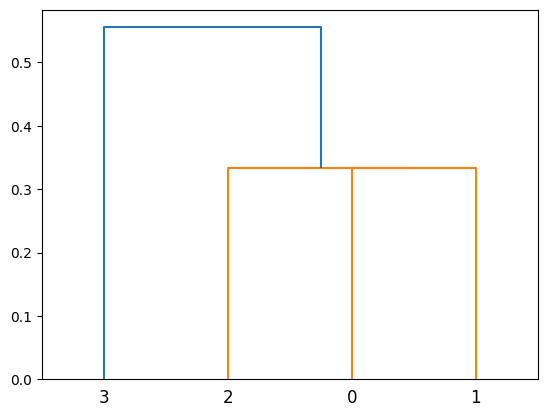

In [21]:
sequences = ["ATG", "ATC", "ACG", "GTC"]
aligned_sequences = clustalw_alignment(sequences)

## Question (30 Points)
Perform a multiple sequence alignment of the Large Ribosomal Subunit Protein uL10 across different species using both the STAR and CLUSTAL W algorithms. Compare the alignment results based on sequence similarity, conservation patterns, and alignment quality.

Steps:
1. Data
    * Go to the UniProt database (https://www.uniprot.org/) and search for the following proteins:
        * RLA0_HUMAN (UniProt ID: P05388)
        * RLA0_MOUSE (UniProt ID: P14869)
        * RLA0_CHICK (UniProt ID: P47826)
        * RL10_SULAC (UniProt ID: P35023)
        * RL10_PICTO (UniProt ID: Q6L1X8)
        * RL10_HALMA (UniProt ID: P15825 )
    * Download the FASTA files for each protein sequence.
    * Use the Python function you implemented to read the FASTA files. For simplicity, extract and use only the first 100 amino acids from each sequence.

2. Multiple sequence alignment
    * Perform the multiple sequence alignment using the `clustalw_alignment` and `star_alignment` functions.
    * Compare the alignment results visually and provide a detailed discussion of your findings.

In [22]:
# write your code here
from Bio import SeqIO

# Read sequences from FASTA files and extract first 100 amino acids
def read_fasta(file_path):
    with open(file_path, "r") as file:
        record = SeqIO.read(file, "fasta")
        return str(record.seq[:100])  # Return first 100 amino acids

# Sequences for each species
sequences = {
    "RLA0_HUMAN": read_fasta("RLA0_Human.txt"),
    "RLA0_MOUSE": read_fasta("RLA0_Mouse.txt"),
    "RLA0_CHICK": read_fasta("RLA0_Chick.txt"),
    "RL10_SULAC": read_fasta("RLA0_Sulac.txt"),
    "RL10_PICTO": read_fasta("RLA0_Picto.txt"),
    "RL10_HALMA": read_fasta("RLA0_Halma.txt")
}

# Extract just the sequences
seq_list = list(sequences.values())

MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MPREDRATWKSNYFMKIIQLLDDYPKCFVVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MIGLAVTTTKKIAKWKVDEVAELTEKLKTHKTIIIANIEGFPADKLHEIRKKLRGKADIKVTKNNLFNIALKNAGYDTKLFESYLTGPNAFIFTDTNPFE
MTEPAQWKIDFVKNLENEINSRKVAAIVSIKGLRNNEFQKIRNSIRDKARIKVSRARLLRLAIENTGKNNIVKLKDYAHGQVALITTDESPKKIYDILEK
MSAESERKTETIPEWKQEEVDAIVEMIESYESVGVVNIAGIPSRQLQDMRRDLHGTAELRVSRNTLLERALDDVDDGLEDLNGYITGQVGLIGTDDNPFS


MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
||||||||||||||.|||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

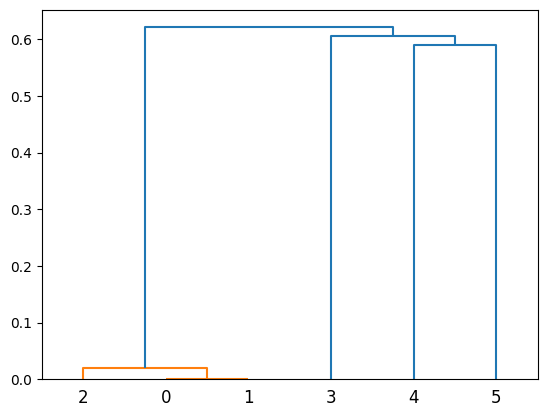

In [23]:
for name in sequences:
  print(sequences[name])
print("\n")

# Perform MSA using both STAR and CLUSTAL W algorithms
aligned_clustalw = clustalw_alignment(seq_list)
aligned_star = star_alignment(seq_list, blosum62)  # Define or use an appropriate scoring matrix

# Print aligned sequences
display_msa(aligned_star)
print("")


<div dir=rtl>
توالی human به‌عنوان مرجع، با mouse و chicken شباهت بسیار بالایی دارد و تغییرات اندک آن‌ها تطبیقی است، که نشان‌دهنده حفاظت تکاملی این پروتئین در یوکاریوت‌هاست. توالی‌های پروکاریوتی sulac و picto تفاوت‌های قابل‌توجهی با یوکاریوت‌ها دارند اما شباهت بیشتری به یکدیگر نشان می‌دهند، که بیانگر مسیر تکاملی مشترک آن‌هاست. توالی halma از آرکی‌ها، بیشترین فاصله را با سایر توالی‌ها دارد اما شباهت محدودی با پروکاریوت‌ها در بخش‌های عملکردی محافظت‌شده نشان می‌دهد. این نتایج بیانگر تفاوت‌های تکاملی گسترده بین یوکاریوت‌ها، پروکاریوت‌ها و آرکی‌ها است.

در Star Alignment، تفاوت‌ها و شباهت‌ها با جزئیات دقیق نشان داده شده‌اند. توالی‌های اول و دوم کاملاً یکسان هستند، توالی سوم تفاوت جزئی دارد، و توالی‌های چهارم تا ششم تفاوت‌های بیشتری نشان می‌دهند. این روش برای شناسایی جهش‌های دقیق مناسب است.

در ClustalW، فاصله و ارتباط توالی‌ها به صورت گراف درختی نمایش داده شده است. توالی‌های مشابه نزدیک‌تر هستند و تفاوت‌ها با شاخه‌های طولانی‌تر مشخص می‌شوند. این روش برای تحلیل کلی و خوشه‌بندی توالی‌ها کاربرد دارد.

به طور کلی، Star Alignment برای بررسی جزئیات و ClustalW برای تحلیل روابط کلی مناسب‌تر است.


</div>

In [24]:
import os
import zipfile
from google.colab import files

# Function to zip the 'content/' directory
def zip_content_directory(output_filename='content_session.zip'):
    # Define the directory to zip (the content directory)
    directory = '/content'

    # Create a zip file
    with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory and add files to the zip
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory))

    # Return the zip file
    return output_filename

# Zip the content directory and download it
output_filename = zip_content_directory()
files.download(output_filename)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>